In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("C:\\Users\\adars\\Downloads\\Bank Customer Churn Prediction.csv")
df.shape

(10000, 12)

In [3]:
df.sample(8)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
6980,15748360,644,Germany,Female,34,10,122196.99,2,1,1,182099.71,0
2893,15719606,657,France,Male,50,9,0.00,2,0,0,37171.46,0
2631,15681196,629,France,Male,35,1,172170.36,1,1,1,159777.37,0
5730,15577683,539,France,Female,29,4,0.00,2,1,1,100919.19,0
7726,15757617,735,France,Male,55,6,134140.68,1,1,0,2267.88,0
9240,15723872,589,Spain,Female,46,10,0.00,2,0,1,168369.37,0
6151,15761525,727,Spain,Female,31,10,96997.09,2,0,0,76614.04,0
4792,15809991,756,Spain,Male,19,4,130274.22,1,1,1,133535.29,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [6]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.duplicated().sum()

0

Text(0.5, 1.0, 'Credit Score before Handling Outliers')

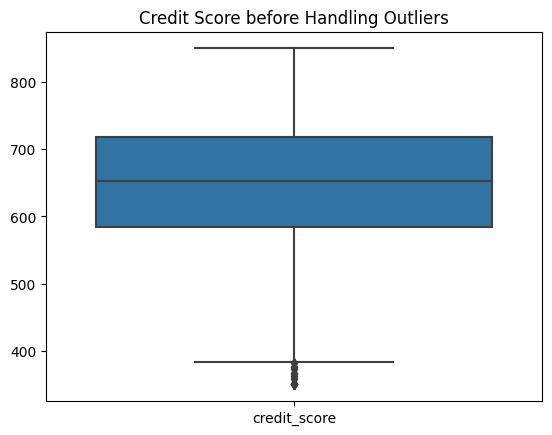

In [8]:
sns.boxplot(df[['credit_score']])
plt.title('Credit Score before Handling Outliers')

In [9]:
Q1 = df['credit_score'].quantile(0.25)
Q3 = df['credit_score'].quantile(0.75)

In [10]:
IQR = Q3 - Q1
Lower_fence = Q1 - 1.5*IQR
Upper_fence = Q3 + 1.5*IQR

In [11]:
df[df['credit_score'] < Lower_fence]

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
942,15804586,376,France,Female,46,6,0.00,1,1,0,157333.69,1
1193,15779947,363,Spain,Female,28,6,146098.43,3,1,0,100615.14,1
1405,15612494,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
1631,15685372,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
1838,15758813,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
1962,15692416,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1
2473,15679249,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1
2579,15597896,365,Germany,Male,30,0,127760.07,1,1,0,81537.85,1
8154,15791533,367,Spain,Male,42,6,93608.28,1,1,0,168816.73,1


## Capping

In [12]:
df['credit_score'] = np.where(df['credit_score'] < Lower_fence, Lower_fence, df['credit_score'])

Text(0.5, 1.0, 'Credit Score after Handling Outliers')

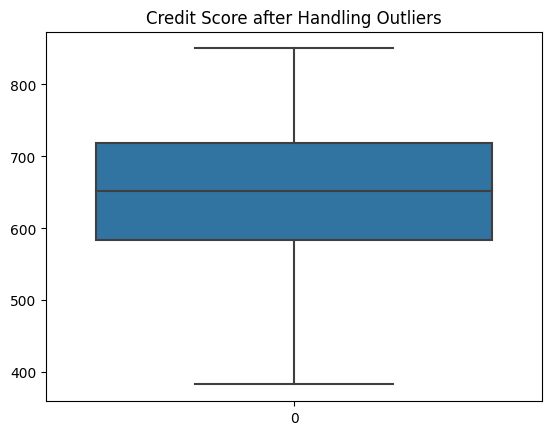

In [13]:
sns.boxplot(df['credit_score'])
plt.title('Credit Score after Handling Outliers')

Text(0.5, 1.0, 'Age before Handling Outliers')

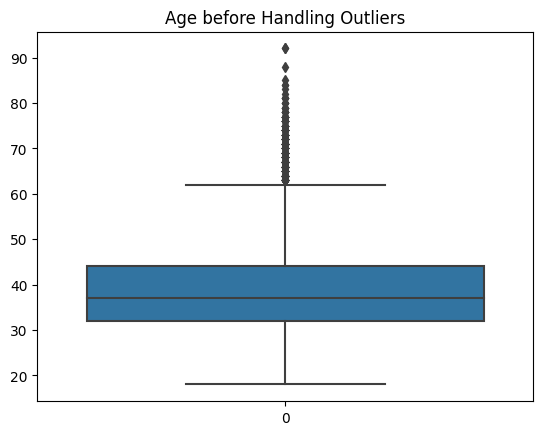

In [14]:
sns.boxplot(df['age'])
plt.title('Age before Handling Outliers')

In [15]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
Lower_fence = Q1 - 1.5*IQR
Upper_fence = Q3 + 1.5*IQR

In [16]:
df['age'] = np.where(df['age'] > Upper_fence, Upper_fence, df['age'])

Text(0.5, 1.0, 'Age after Handling Outliers')

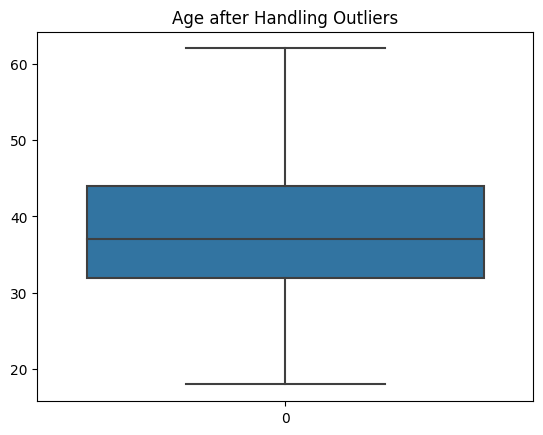

In [17]:
sns.boxplot(df['age'])
plt.title('Age after Handling Outliers')

In [18]:
df.drop(columns=['customer_id'], inplace = True)

In [19]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502.0,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699.0,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850.0,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,France,Male,39.0,5,0.00,2,1,0,96270.64,0
9996,516.0,France,Male,35.0,10,57369.61,1,1,1,101699.77,0
9997,709.0,France,Female,36.0,7,0.00,1,0,1,42085.58,1
9998,772.0,Germany,Male,42.0,3,75075.31,2,1,0,92888.52,1


In [20]:
df['country'].value_counts()

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [21]:
df['gender'].value_counts()

gender
Male      5457
Female    4543
Name: count, dtype: int64

C:\Users\adars\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


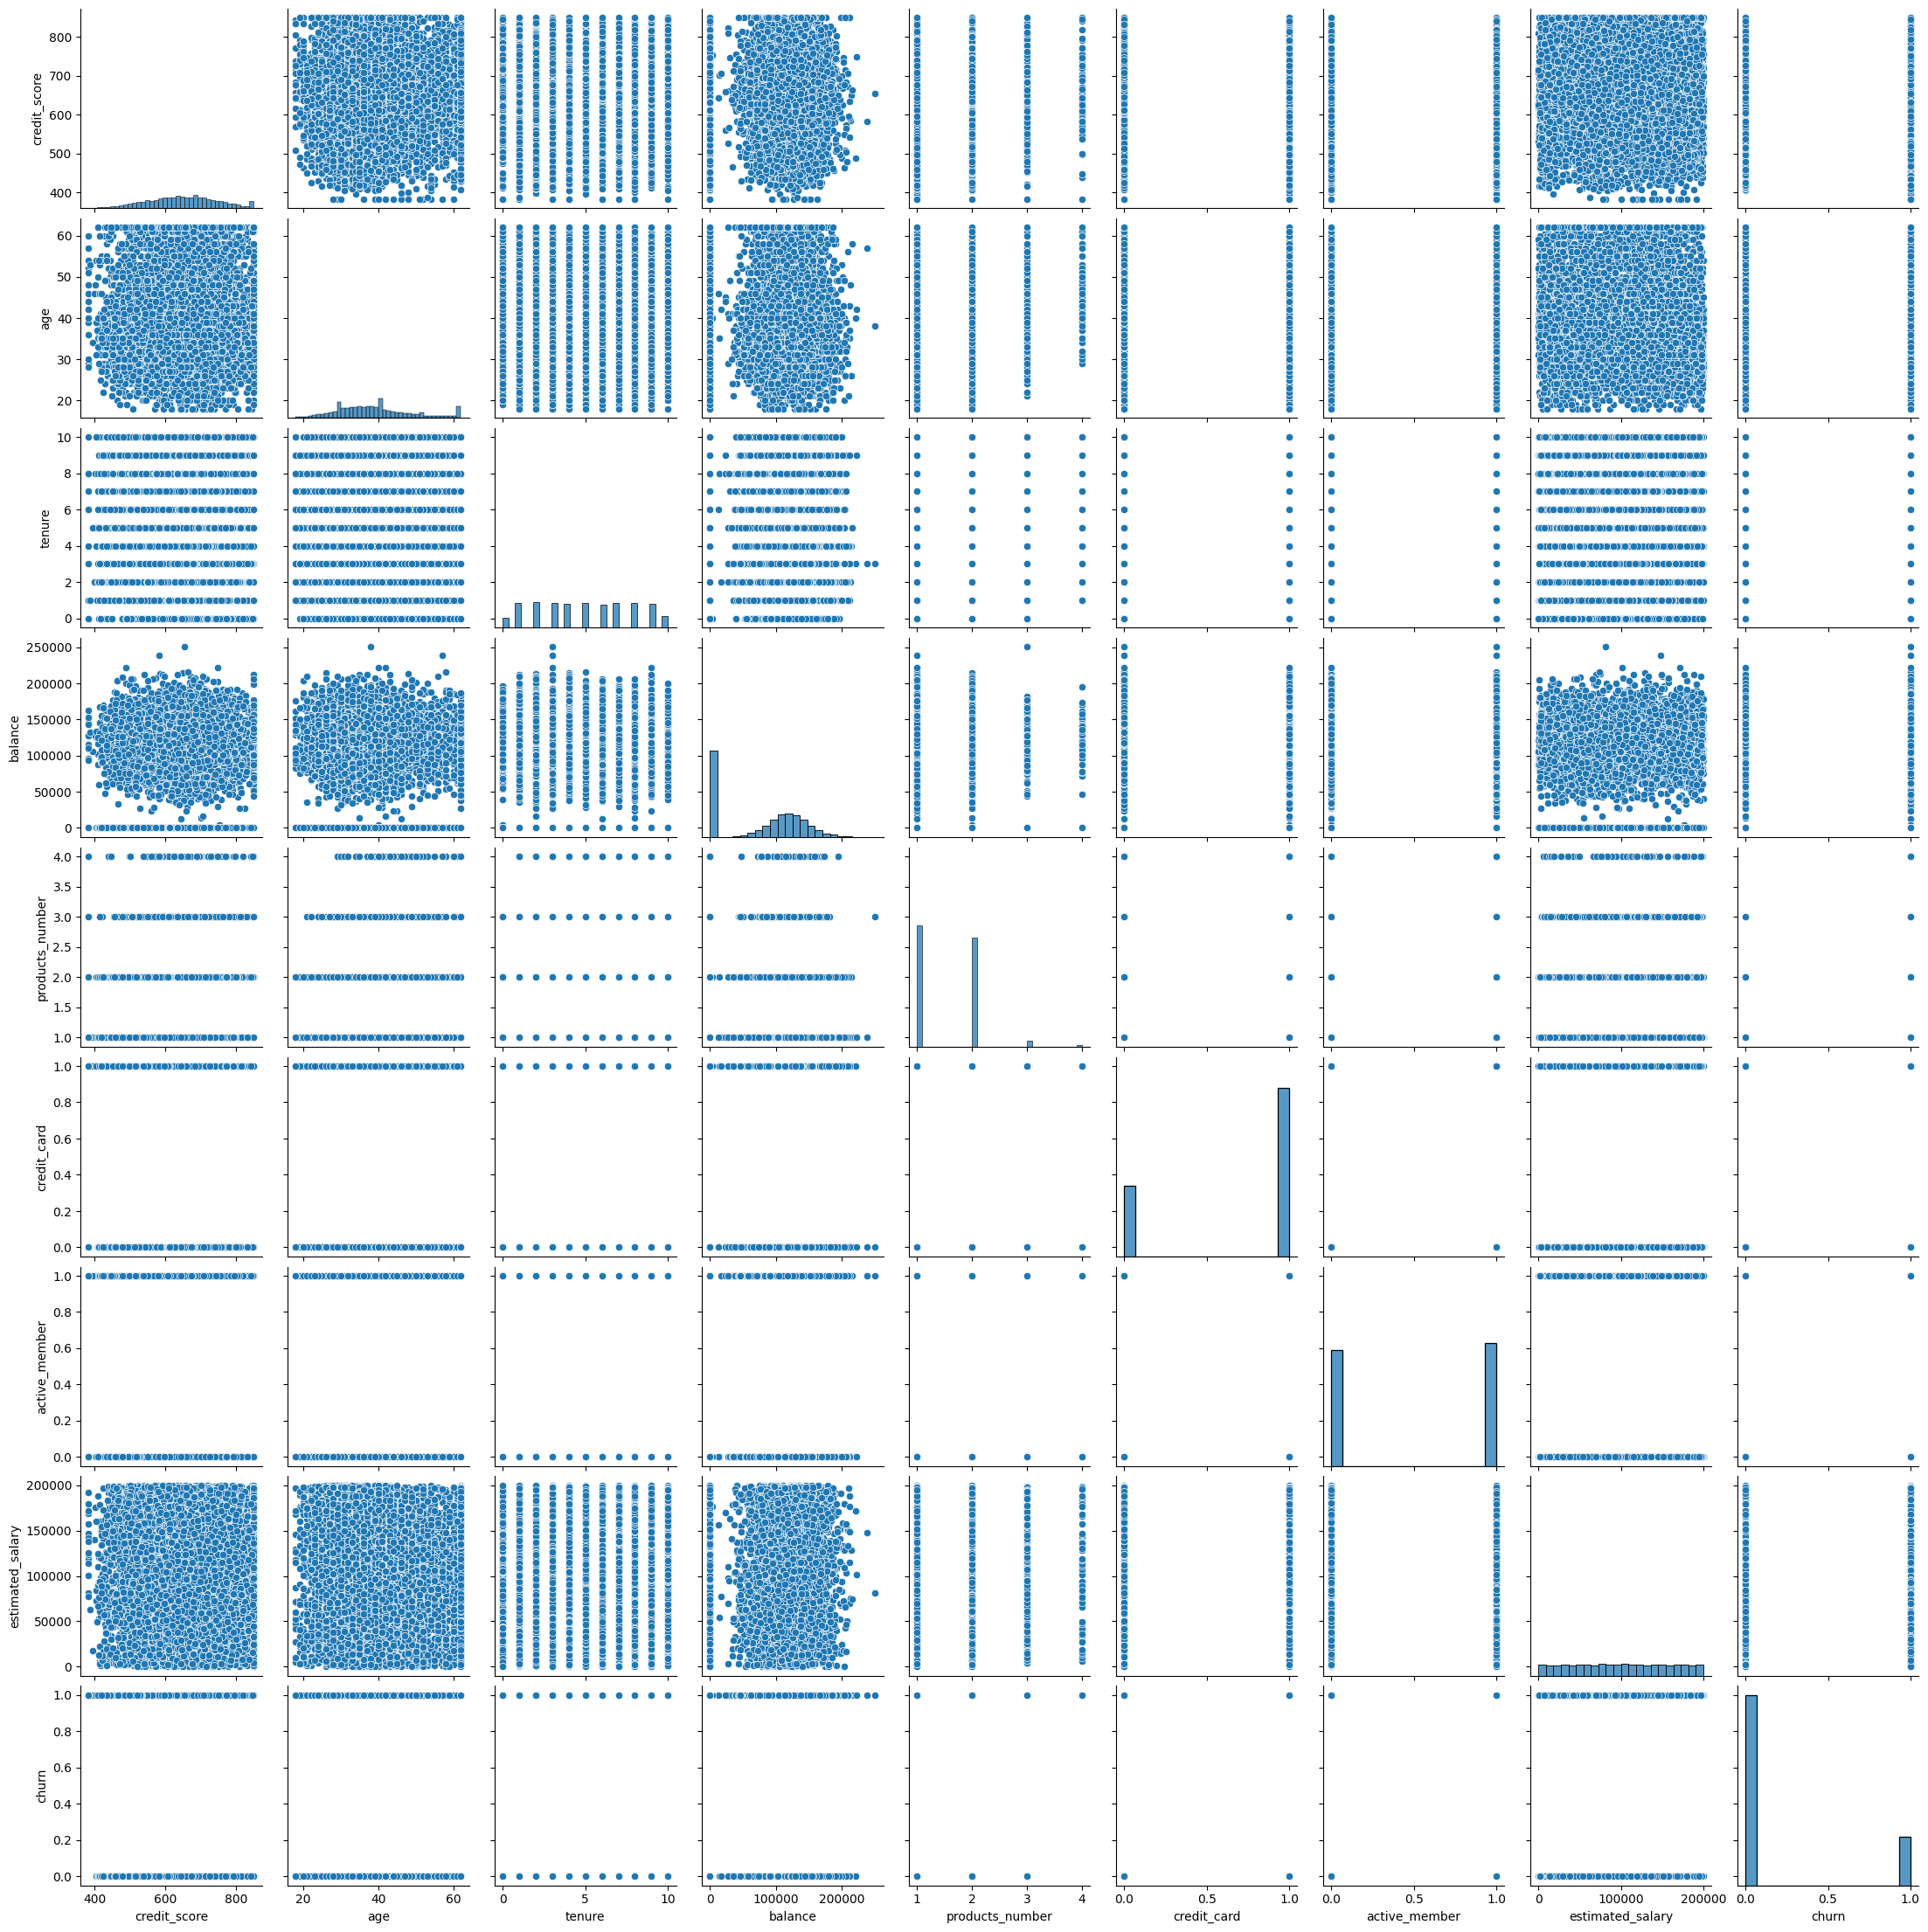

In [22]:
sns.pairplot(df)
plt.show()

# Data Encoding

In [23]:
df = pd.get_dummies(df,columns=['country', 'gender'],drop_first=True, dtype = int)

In [24]:
df.sample(5)

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
1455,686.0,35.0,2,109342.82,2,0,1,86043.27,0,1,0,1
8039,672.0,43.0,4,92599.55,2,1,1,167336.78,0,0,0,0
4547,850.0,37.0,9,122506.38,1,0,1,199693.84,1,1,0,1
2494,666.0,46.0,5,123873.19,1,1,1,177844.06,0,0,0,1
6963,613.0,39.0,8,118201.41,1,1,0,23315.59,0,0,1,1


In [25]:
X = df.drop(columns=['churn'])
y = df['churn']

In [26]:
X.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male
0,619.0,42.0,2,0.00,1,1,1,101348.88,0,0,0
1,608.0,41.0,1,83807.86,1,0,1,112542.58,0,1,0
2,502.0,42.0,8,159660.80,3,1,0,113931.57,0,0,0
3,699.0,39.0,1,0.00,2,0,0,93826.63,0,0,0
4,850.0,43.0,2,125510.82,1,1,1,79084.10,0,1,0


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=3)

In [29]:
X_train.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male
2377,549.0,50.0,9,94748.76,2,0,1,13608.18,0,0,1
6515,803.0,62.0,2,151659.52,2,0,1,6930.17,0,0,0
292,583.0,27.0,7,0.00,2,1,0,51285.49,0,0,1
2859,551.0,32.0,4,0.00,2,1,0,53420.53,0,1,1
1912,687.0,29.0,4,78939.15,1,1,0,122134.56,1,0,0


# Scaling the Data

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [32]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
X_train

array([[-1.05567443,  1.17176625,  1.38338787, ..., -0.58104535,
        -0.57180758,  0.91505991],
       [ 1.58343545,  2.40611392, -1.04490673, ..., -0.58104535,
        -0.57180758, -1.09282462],
       [-0.70240775, -1.19406679,  0.68958941, ..., -0.58104535,
        -0.57180758,  0.91505991],
       ...,
       [ 0.2846609 ,  1.68607778, -0.35110827, ...,  1.72103606,
        -0.57180758,  0.91505991],
       [-0.51538422,  0.24600549, -1.39180596, ..., -0.58104535,
        -0.57180758, -1.09282462],
       [-0.73357834, -0.37116835,  1.7302871 , ...,  1.72103606,
        -0.57180758,  0.91505991]])

In [34]:
X_test

array([[ 0.55480601,  0.04028088, -1.04490673, ..., -0.58104535,
        -0.57180758,  0.91505991],
       [-0.09977636, -0.37116835, -0.00420904, ..., -0.58104535,
        -0.57180758,  0.91505991],
       [-0.99333325,  0.76031702, -0.35110827, ...,  1.72103606,
        -0.57180758, -1.09282462],
       ...,
       [ 1.11587662, -1.60551602, -0.00420904, ...,  1.72103606,
        -0.57180758, -1.09282462],
       [-1.01411365, -0.16544373, -1.04490673, ..., -0.58104535,
        -0.57180758,  0.91505991],
       [ 0.11841776, -0.06258143, -0.35110827, ..., -0.58104535,
         1.74884006,  0.91505991]])

# Training the Model

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
classifier = LogisticRegression()

In [37]:
classifier.fit(X_train,y_train)

LogisticRegression()

In [38]:
y_pred = classifier.predict(X_test)

# Calculating Accuracy Score

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, classification_report

In [40]:
accuracy_score(y_pred,y_test)

0.8104

In [41]:
recall_score(y_pred,y_test)

0.6037735849056604

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1982
           1       0.60      0.25      0.35       518

    accuracy                           0.81      2500
   macro avg       0.72      0.60      0.62      2500
weighted avg       0.78      0.81      0.78      2500

